#RNN

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

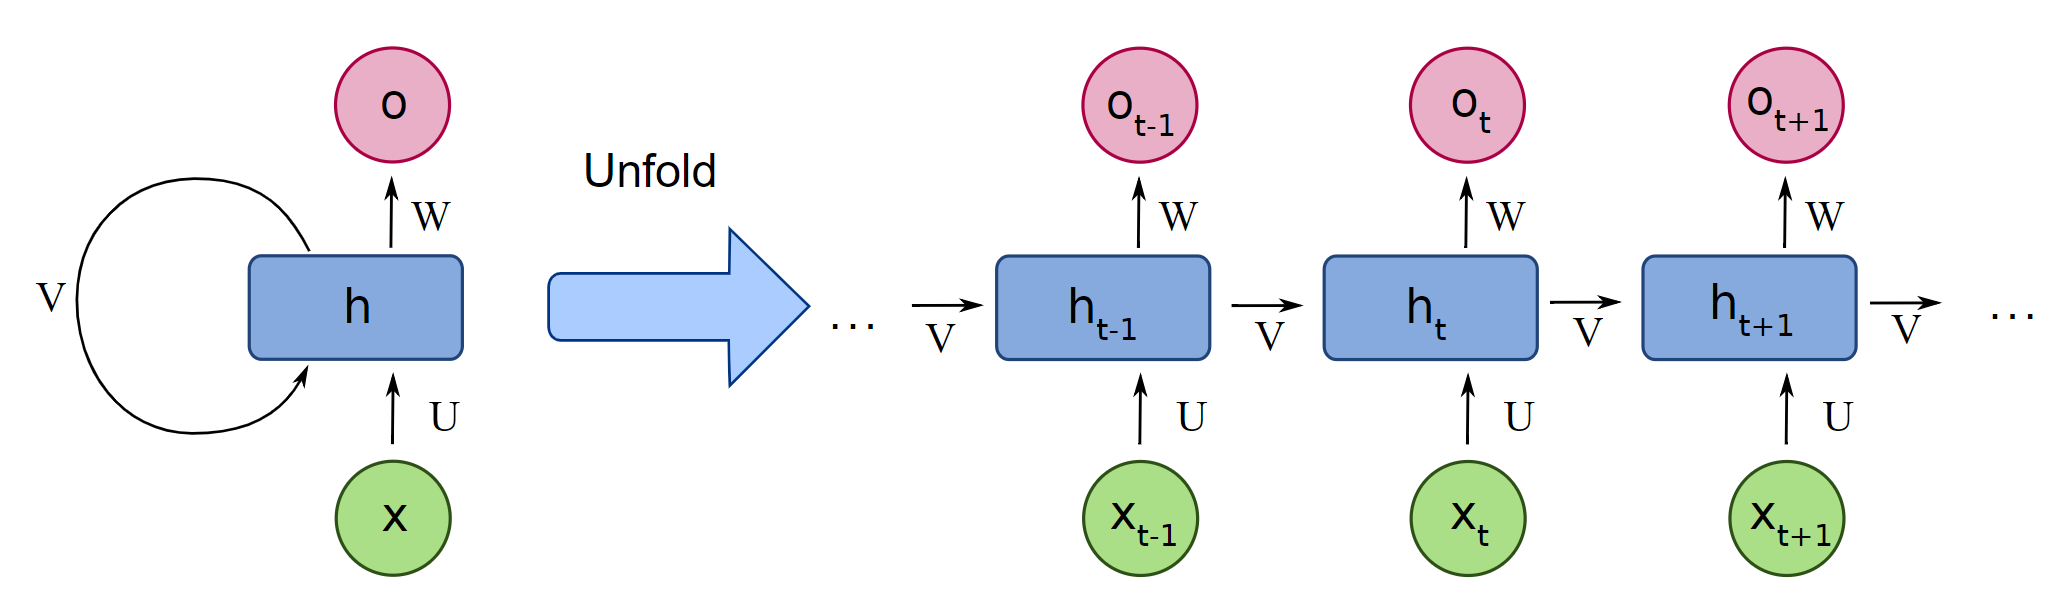

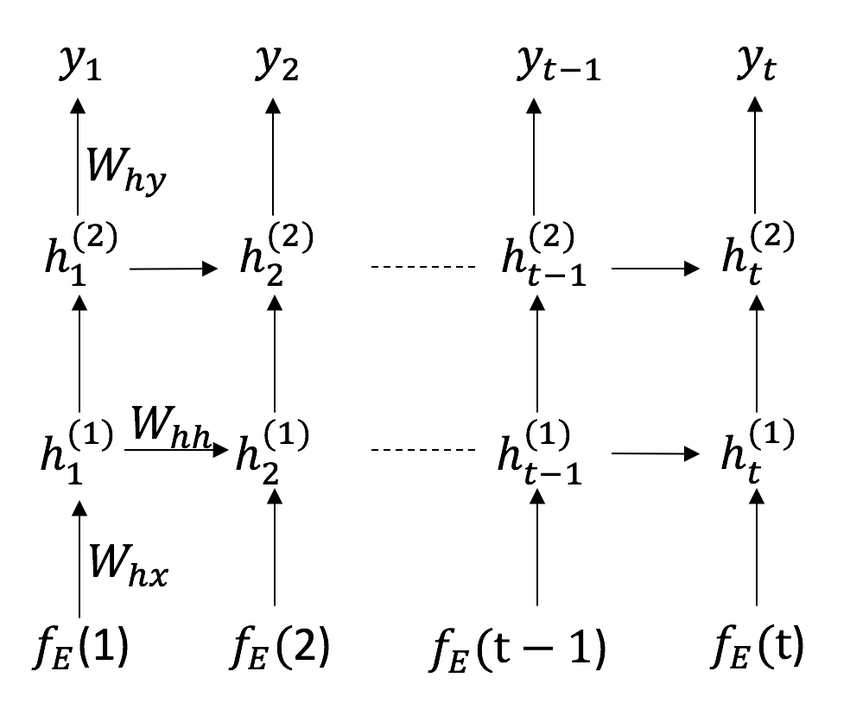

In [ ]:
# declare dimension
input_size = 4
hidden_size = 2

In [ ]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
# (batch size, seq length, input_size)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)  # (3, 5, 4)

In [ ]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

In [ ]:
# declare RNN
rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

In [ ]:
# check output
outputs, _status = rnn(input_data)
# inputs: input, h_0 = 0 (num_layers*num_directions, batch, hidden_size)
print(outputs)
print(outputs.size())
print()
# shape : (3, 5, 2)
# (batch size, seq length, hidden_size)

print(_status)
print(_status.size())

tensor([[[-0.7497, -0.6135],
         [-0.5753, -0.0070],
         [-0.9077, -0.3205],
         [-0.9141, -0.2142],
         [-0.8996,  0.3307]],

        [[-0.5282, -0.2473],
         [-0.9052,  0.2597],
         [-0.8944, -0.2902],
         [-0.9133, -0.2209],
         [-0.9109, -0.2263]],

        [[-0.9136, -0.4269],
         [-0.9173, -0.1989],
         [-0.5134, -0.0288],
         [-0.5086, -0.1379],
         [-0.9126, -0.3170]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 2])

tensor([[[-0.8996,  0.3307],
         [-0.9109, -0.2263],
         [-0.9126, -0.3170]]], grad_fn=<StackBackward>)
torch.Size([1, 3, 2])


In [ ]:
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[ 0.0339, -0.0514],
         [ 0.0782,  0.0703],
         [ 0.0997,  0.1513],
         [ 0.0842,  0.1630],
         [ 0.0020,  0.2119]],

        [[ 0.0554,  0.1055],
         [ 0.0041,  0.2296],
         [-0.0039,  0.2207],
         [-0.0114,  0.2099],
         [-0.0162,  0.2045]],

        [[ 0.0191,  0.0915],
         [ 0.0239,  0.1391],
         [ 0.0530,  0.1443],
         [ 0.0769,  0.1727],
         [ 0.0839,  0.2559]]], grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 2])

tensor([[[ 0.0020,  0.2119],
         [-0.0162,  0.2045],
         [ 0.0839,  0.2559]]], grad_fn=<StackBackward>)
torch.Size([1, 3, 2])


In [ ]:
gru = nn.GRU(input_size, hidden_size, batch_first=True)
outputs, _status = gru(input_data)
print(outputs)
print(outputs.size())
print()

print(_status)
print(_status.size())

tensor([[[ 0.3044,  0.1995],
         [ 0.3212,  0.2732],
         [-0.0498, -0.2167],
         [-0.2549, -0.3426],
         [-0.2249, -0.3019]],

        [[ 0.2339,  0.1562],
         [ 0.0143, -0.1343],
         [-0.2198, -0.3237],
         [-0.3289, -0.3832],
         [-0.3745, -0.4091]],

        [[-0.2014, -0.3100],
         [-0.3206, -0.3787],
         [ 0.1032, -0.0161],
         [ 0.2457,  0.1677],
         [-0.0924, -0.2463]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 2])

tensor([[[-0.2249, -0.3019],
         [-0.3745, -0.4091],
         [-0.0924, -0.2463]]], grad_fn=<StackBackward>)
torch.Size([1, 3, 2])


## Exercise. Apply RNN to image classification.

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./mnist', train=False, transform=transform)


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw




Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
from multiprocessing import cpu_count

In [ ]:
num_workers = int(cpu_count() / 2)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [ ]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, seq_length, input_size, hidden_size, num_classes, device):
        super().__init__()
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        self.rnn = nn.RNN(
                            input_size=input_size,     # 28 = the number of feature at each time step
                            hidden_size=hidden_size,   # 50 = number of feature you want to have in neural model 
                            nonlinearity='tanh',       # activation func (default)
                            batch_first=True,          # seq_length, batch_size, input_size when you set your model as batch_first = False 
                        )
        (input_size=input_size, hidden_size=hidden_size, batch_first=True,)
        self.fc = nn.Linear(seq_length * hidden_size, num_classes) # 28 * 50 1400 / 10
        
        # seq_length = 28 
        # input_size = 28
        # batch = 64
        # hidden_size = 50
        # num_classes = 10

        # image = (batch_size, channel_size, width, height)
        # image_rnn = (batch_siz, seq_length, input_size = height x channel_size)

    def forward(self, x):  # (batch_size, channel_size, width, height)
        x = x.view(-1, self.seq_length, self.input_size)  # (-1, 28, 28)
        x, hidden = self.rnn(x) # batchsize, seq_length, hidden
        x = x.reshape(-1, (self.seq_length * self.hidden_size)) # reshape used // .contiguous() 
        out = self.fc(x)        # batchsize, num_classes
        return out 

In [ ]:
# parameters
seq_length = 28
input_size = 28  # w, h 
hidden_size = 50
num_classes = 10
epochs = 10

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch.optim as optim

In [ ]:
model = ImageRNN(batch_size, seq_length, input_size, hidden_size, num_classes, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# %%time

for epoch in range(epochs):
    # Train
    model.train()
    
    train_loss = 0
    train_correct = 0
    
    for x, y in trainloader:
        optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
                
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_correct += predicted.eq(y).sum().item()
        
    train_loss = train_loss / len(trainloader)
    train_acc = train_correct / len(trainset)
        
    print('[%2d] TRAIN loss: %.3f, acc: %.3f' % (epoch+1, train_loss, train_acc))

[ 1] TRAIN loss: 0.343, acc: 0.899
[ 2] TRAIN loss: 0.162, acc: 0.951
[ 3] TRAIN loss: 0.117, acc: 0.965
[ 4] TRAIN loss: 0.094, acc: 0.971
[ 5] TRAIN loss: 0.081, acc: 0.975
[ 6] TRAIN loss: 0.071, acc: 0.978
[ 7] TRAIN loss: 0.066, acc: 0.979
[ 8] TRAIN loss: 0.059, acc: 0.982
[ 9] TRAIN loss: 0.055, acc: 0.982
[10] TRAIN loss: 0.050, acc: 0.984


In [ ]:
# Test
model.eval()

test_loss = 0
test_correct = 0
test_preds = []

with torch.no_grad():
    for i, (x, y) in enumerate(testloader):
        x = x.view(-1, 28, 28)
        
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
        
        test_loss += loss.item()
        _, predicted = outputs.max(1)
        test_correct += predicted.eq(y).sum().item()
        
        if i == 0:
            test_preds = predicted
        else:
            test_preds = torch.cat((test_preds, predicted), dim=0)
            
test_preds = test_preds.cpu()

print('TEST loss: %.4f, acc: %.4f' % (test_loss/len(testloader), test_correct/len(testset)))

TEST loss: 0.0506, acc: 0.9831


In [ ]:
print(test_preds)

tensor([7, 2, 1,  ..., 4, 5, 6])
